In [1]:
import pandas as pd
import numpy as np

url='https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/ames_housing_no_missing.csv'

In [2]:
ames_housing = pd.read_csv('ames_housing_no_missing.csv')
ames_housing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125


In [3]:
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

# Preprocessing features

In [4]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector

### Categorical Imputers

In [5]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

### Numerical Imputers

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
# from sklearn.impute import IterativeImputer

### LightLGBM inputer

LightLGBM inputer
https://github.com/analokmaus/kuma_utils

https://github.com/analokmaus/kuma_utils/blob/master/examples/Data_preprocessing.ipynb

In [7]:
# !git clone https://github.com/analokmaus/kuma_utils.git
#  python -m pip install git+https://github.com/analokmaus/kuma_utils.git
# import sys
# sys.path.append("kuma_utils/")

from kuma_utils.preprocessing.imputer import LGBMImputer

imputer = LGBMImputer(cat_features=categorical_index, n_iter=200, verbose=True)
train_encoded2 = imputer.fit_transform(train_encoded)
test_encoded2 = imputer.transform(test_encoded)

## Transformer on Object columns

In [8]:
from sklearn.preprocessing import OrdinalEncoder

categorical_processor = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1)

## Transformer on Numeric columns

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

numeric_preprocessors = [
                        None,
                        StandardScaler(),
                        MinMaxScaler(),
                        QuantileTransformer(n_quantiles=100),
                        PowerTransformer(method="box-cox"),
                        ]



## Transformer on same column with Pipeline

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

numeric_transformer = Pipeline(
                            steps=[
                                ("imputer", SimpleImputer(strategy="median")),
                                ("scaler", StandardScaler())
                                ]
                            )

## Transformer on all Columns

In [11]:
single_numeric_preprocessor = StandardScaler()

preprocessor = make_column_transformer(
                                        (categorical_processor, selector(dtype_include=object)),
                                        (single_numeric_preprocessor, selector(dtype_exclude=object))
                                    )

# Make Pipeline

In [12]:
from sklearn.tree import DecisionTreeRegressor

model = make_pipeline(preprocessor, DecisionTreeRegressor(max_depth=7, random_state=0))

# Cross Validation on pipeline

In [13]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
                            model,
                            data,
                            target,
                            cv=10,
                            return_estimator=True,
                            n_jobs=2
                            )

cv_results["test_score"].mean()


0.7668234519871657

In [14]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000000175550A5B0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000000175550A670>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=7, random_state=0))])

## Change model parameters

In [15]:
for parameter in model.get_params():
    print(parameter)

memory
steps
verbose
columntransformer
decisiontreeregressor
columntransformer__n_jobs
columntransformer__remainder
columntransformer__sparse_threshold
columntransformer__transformer_weights
columntransformer__transformers
columntransformer__verbose
columntransformer__verbose_feature_names_out
columntransformer__ordinalencoder
columntransformer__standardscaler
columntransformer__ordinalencoder__categories
columntransformer__ordinalencoder__dtype
columntransformer__ordinalencoder__encoded_missing_value
columntransformer__ordinalencoder__handle_unknown
columntransformer__ordinalencoder__unknown_value
columntransformer__standardscaler__copy
columntransformer__standardscaler__with_mean
columntransformer__standardscaler__with_std
decisiontreeregressor__ccp_alpha
decisiontreeregressor__criterion
decisiontreeregressor__max_depth
decisiontreeregressor__max_features
decisiontreeregressor__max_leaf_nodes
decisiontreeregressor__min_impurity_decrease
decisiontreeregressor__min_samples_leaf
decisio

In [16]:
model.set_params(decisiontreeregressor__max_depth=10)

cv_results_ss_5 = cross_validate(
                                model,
                                data,
                                target,
                                cv=10,
#                                 scoring="balanced_accuracy"
                                )

cv_results_ss_5["test_score"].mean(),cv_results_ss_5["test_score"].std()

(0.7435816765594674, 0.10832879631439234)

# Gridsearch on pipeline

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
#             "preprocessor": numeric_preprocessors,
            "decisiontreeregressor__max_leaf_nodes": [2, 10, 20,30],
            }

grid_search = GridSearchCV(
                            model,
                            param_grid=param_grid,
#                             scoring="balanced_accuracy",
                            cv=10,
                            ).fit(data, target)

results = pd.DataFrame(grid_search.cv_results_).sort_values(
                                                by="rank_test_score", ascending=True
                                                )

# convert the name of the preprocessor for later display
# results["param_preprocessor"] = results["param_preprocessor"].apply(
#                             lambda x: x.__class__.__name__ if x is not None else "None"
#                             )

results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeregressor__max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
3,0.052513,0.001410,0.014114,0.000538,30,{'decisiontreeregressor__max_leaf_nodes': 30},0.765530,0.795340,0.835275,0.643005,0.821578,0.812052,0.780490,0.736857,0.577527,0.749516,0.751717,0.077981,1
2,0.048442,0.004689,0.015626,0.000015,20,{'decisiontreeregressor__max_leaf_nodes': 20},0.761225,0.764991,0.825659,0.627587,0.806993,0.750255,0.771589,0.722205,0.561109,0.713931,0.730554,0.076646,2
1,0.061234,0.012962,0.015015,0.007655,10,{'decisiontreeregressor__max_leaf_nodes': 10},0.674392,0.759326,0.805400,0.724347,0.763779,0.725565,0.711567,0.711333,0.490451,0.655082,0.702124,0.081697,3
0,0.068057,0.011121,0.017480,0.006116,2,{'decisiontreeregressor__max_leaf_nodes': 2},0.361969,0.460521,0.479714,0.456965,0.531654,0.448972,0.431220,0.413985,0.429643,0.396686,0.441133,0.044250,4


## Cross validation on gridsearch

In [18]:
cv_results = cross_validate(
                            grid_search,
                            data,
                            target,
                            cv=10,
                            n_jobs=2,
#                             scoring="balanced_accuracy",
                            return_estimator=True,
                            )

cv_results = pd.DataFrame(cv_results)
cv_test_scores = cv_results['test_score']

print(
    "Generalization score with hyperparameters tuning:\n"
    f"{cv_test_scores.mean():.3f} +/- {cv_test_scores.std():.3f}"
)

Generalization score with hyperparameters tuning:
0.744 +/- 0.082


## Get best parameters

In [19]:
for estimator in cv_results["estimator"]:
    print(estimator.best_params_)

{'decisiontreeregressor__max_leaf_nodes': 30}
{'decisiontreeregressor__max_leaf_nodes': 20}
{'decisiontreeregressor__max_leaf_nodes': 30}
{'decisiontreeregressor__max_leaf_nodes': 30}
{'decisiontreeregressor__max_leaf_nodes': 30}
{'decisiontreeregressor__max_leaf_nodes': 30}
{'decisiontreeregressor__max_leaf_nodes': 30}
{'decisiontreeregressor__max_leaf_nodes': 20}
{'decisiontreeregressor__max_leaf_nodes': 30}
{'decisiontreeregressor__max_leaf_nodes': 20}


In [20]:
# cv_results

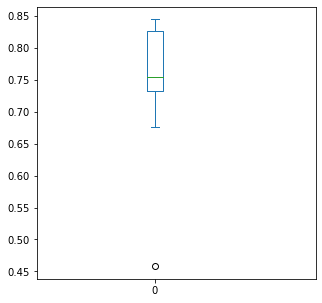

In [21]:
import matplotlib.pyplot as plt
# model = make_pipeline(
#     preprocessor, LogisticRegression(C=0.01, max_iter=5000)
# )
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True, n_jobs=2
)
coefs = [pipeline for pipeline in cv_results["test_score"]]
coefs = pd.DataFrame(coefs)
_, ax = plt.subplots(figsize=(5, 5))
ax.set(xlim=(-0.1, 2.5))
_ = coefs.abs().plot.box( ax=ax)